<a href="https://colab.research.google.com/github/VitikaJain25/HealthCareNLPCourse/blob/main/ANN_Regression_Medical_Insurance_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
insurance_data = pd.read_csv("https://raw.githubusercontent.com/VitikaJain25/MLDataSets/main/insurance.csv")
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Data Manipulation

In [3]:
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
insurance_data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

# Data Preprocessing - Label Encoder

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Training the Label Encoder with Transform
le.fit(insurance_data['sex'].drop_duplicates())

LabelEncoder()

In [6]:
insurance_data['sex'] = le.transform(insurance_data['sex'])

In [7]:
insurance_data['smoker'] = le.fit_transform(insurance_data['smoker'])

In [8]:
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [9]:
insurance_data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [10]:
# one way is one-hot encoding
#pd.get_dummies(insurance_data['region'])

# Other way is Label encoding
insurance_data['region'] = le.fit_transform(insurance_data['region'])

In [11]:
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


# EDA

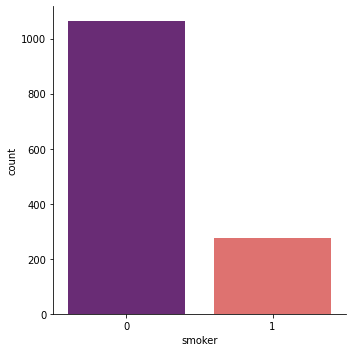

In [12]:
sns.catplot(x = 'smoker', kind = 'count', data = insurance_data, palette = 'magma')
# Majority are Non - smoker
# All objective data type values are gone.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


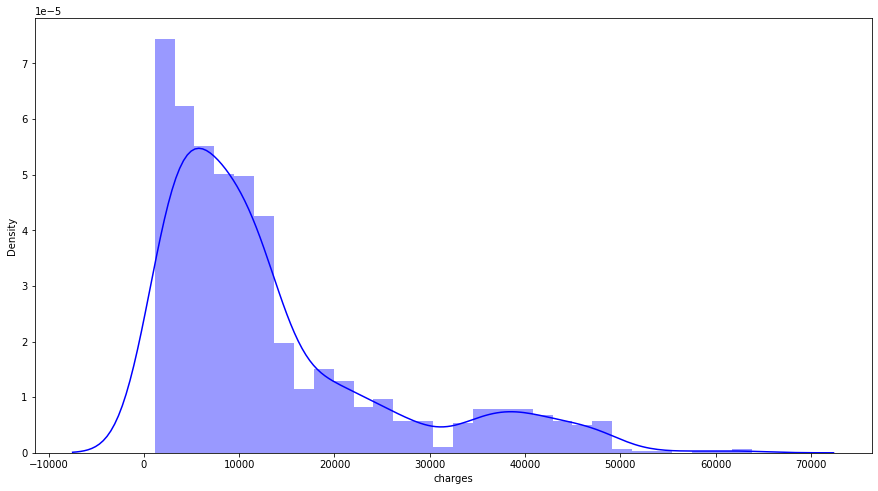

In [13]:
plt.figure(figsize = (15,8))
sns.distplot(insurance_data['charges'], color = 'b')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


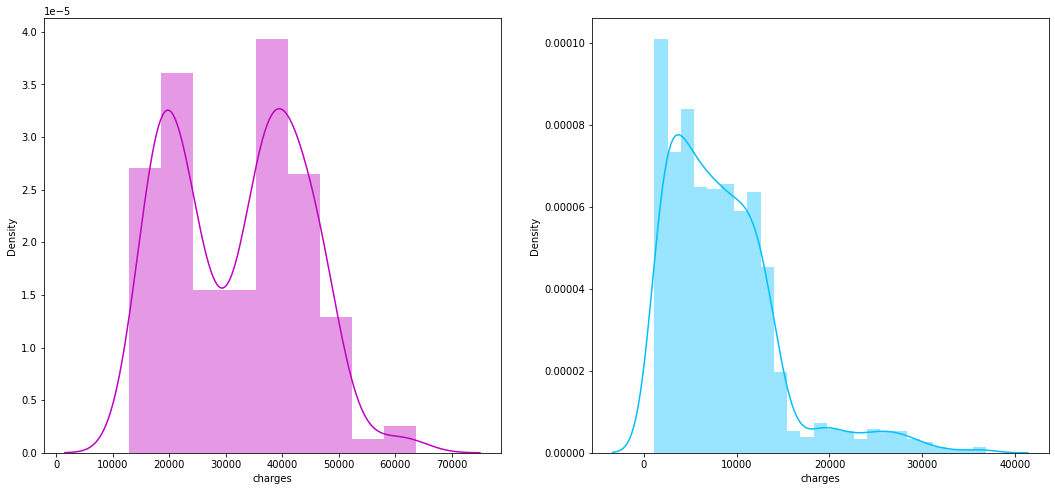

In [14]:
fig = plt.figure(figsize = (18,8))

# 1 row - 2 different images will be plotted.
ax = fig.add_subplot(1, 2, 1)
sns.distplot(insurance_data[(insurance_data['smoker'] == 1)]['charges'], color = 'm', ax = ax)

ax = fig.add_subplot(1, 2, 2)
sns.distplot(insurance_data[(insurance_data['smoker'] == 0)]['charges'], color = 'deepskyblue', ax = ax)
plt.show()

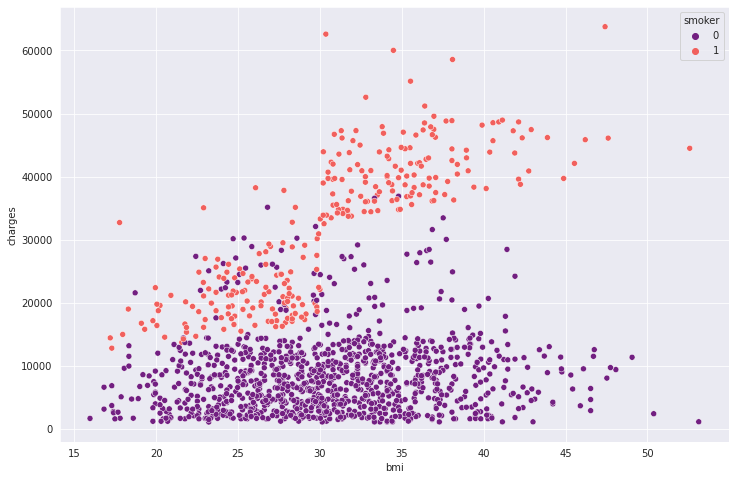

In [20]:
sns.set_style('darkgrid')
plt.figure(figsize = (12,8))
sns.scatterplot(x = 'bmi', y = 'charges', data = insurance_data, hue = 'smoker', palette = 'magma')
plt.show()

## Correlation

*   Features Selection



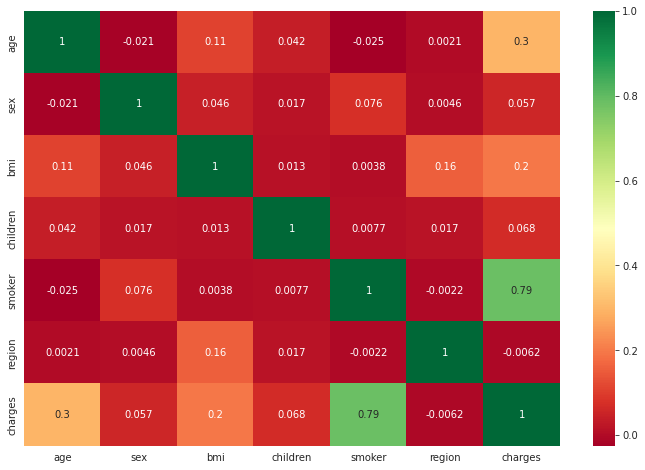

In [23]:
plt.figure(figsize = (12,8))
sns.heatmap(insurance_data.corr(), annot = True, cmap = 'RdYlGn')

## Split Data into Train and Test

In [25]:
X = insurance_data.drop('charges', axis = 1)
y = insurance_data['charges']

## Cross Validation 


*   Spliting Data into Train and Test Samples



In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### ANN Regression

In [27]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop

In [28]:
def build_model():
  # Sequential Neural Network - FeedForward Neural Network
  # Randomly have to choose the units value.
  # We can give different combination of values for the units value. We can write a function and start a loop. At end we will know whcih 
  #combination of values are giving the best accuracy.

  model = Sequential()
  # Units = Num of Neurons (2 * pow(n)), input shape = Num of Features.
  model.add(Dense(units = 128, activation = 'relu', input_shape = [len(X.keys())]))
  # Hidden layer - 1
  model.add(Dense(units = 256, activation = 'relu'))
    # Hidden layer - 2
  model.add(Dense(units = 512, activation = 'relu'))
  # Output Layer - For Regression
  model.add(Dense(units = 1))

  #Optimizers
  optimizers = RMSprop(learning_rate=0.001)

  # Model Compiler
  model.compile(loss = 'mean_squared_error', optimizer = 'RMSprop', metrics = ['mean_squared_error',
                                                                                'mean_absolute_error'])
  return model

In [31]:
model = build_model()

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               896       
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 512)               131584    
                                                                 
 dense_3 (Dense)             (None, 1)                 513       
                                                                 
Total params: 166,017
Trainable params: 166,017
Non-trainable params: 0
_________________________________________________________________


In [35]:
# Epochs = Number of Iterations
# epochs are choosen randomly. If accuracy is low, try increasing the epochs.
# Batch size - no of samples per iteration.
history = model.fit(x_train, y_train, epochs = 600, batch_size = 30, validation_split = 0.2)

Epoch 1/600
29/29 [==============================] - 1s 13ms/step - loss: 265756320.0000 - mean_squared_error: 265756320.0000 - mean_absolute_error: 11359.3076 - val_loss: 242722848.0000 - val_mean_squared_error: 242722848.0000 - val_mean_absolute_error: 9927.9043
Epoch 2/600
29/29 [==============================] - 0s 7ms/step - loss: 144646944.0000 - mean_squared_error: 144646944.0000 - mean_absolute_error: 7885.1201 - val_loss: 147516288.0000 - val_mean_squared_error: 147516288.0000 - val_mean_absolute_error: 9162.0605
Epoch 3/600
29/29 [==============================] - 0s 7ms/step - loss: 124806920.0000 - mean_squared_error: 124806920.0000 - mean_absolute_error: 8725.2285 - val_loss: 144936112.0000 - val_mean_squared_error: 144936112.0000 - val_mean_absolute_error: 9342.9893
Epoch 4/600
29/29 [==============================] - 0s 6ms/step - loss: 124755424.0000 - mean_squared_error: 124755424.0000 - mean_absolute_error: 8754.6562 - val_loss: 144914848.0000 - val_mean_squared_error

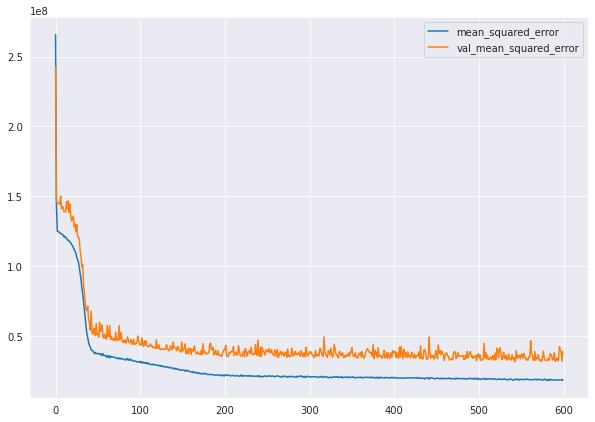

In [38]:
pd.DataFrame(history.history)[['mean_squared_error', 'val_mean_squared_error']].plot(figsize = (10,7))

## Gap between these 2 lines should be minimum. Should be overlappign each other.

## Predictions

In [39]:
# Yhat
predictions = model.predict(x_test)

In [40]:
from sklearn.metrics import r2_score
# r - squared score
r2_score(y_test, predictions)

0.8724232359650107

In [42]:
model.evaluate(x_test, y_test)

9/9 [==============================] - 0s 5ms/step - loss: 20301284.0000 - mean_squared_error: 20301284.0000 - mean_absolute_error: 2265.5479


[20301284.0, 20301284.0, 2265.5478515625]

In [50]:
# MSE and MAE are large values as the y values are large (as seen below)
y_test.sort_values()

808      1131.50660
442      1149.39590
487      1253.93600
747      1627.28245
1335     1629.83350
           ...     
39      48173.36100
530     48675.51770
1062    48970.24760
34      51194.55914
1146    52590.82939
Name: charges, Length: 268, dtype: float64

In [45]:
from sklearn.metrics import mean_squared_error
# RMSE
np.sqrt(mean_squared_error(y_test, predictions))

4505.694802587783

## Predicting new Samples

In [46]:
x_train

,age,sex,bmi,children,smoker,region
621,37,1,34.100,4,1,3
194,18,1,34.430,0,0,2
240,23,0,36.670,2,1,0
1168,32,1,35.200,2,0,3
1192,58,0,32.395,1,0,0
...,...,...,...,...,...,...
763,27,1,26.030,0,0,0
835,42,1,35.970,2,0,2
1216,40,1,25.080,0,0,2
559,19,1,35.530,0,0,1


In [51]:
x_new = [[27, 1, 35.600, 4, 0, 2]]

In [52]:
np.round(model.predict(x_new))

array([[6957.]], dtype=float32)